In [2]:
#Using the time-independent Schrödinger equation to find the eigenfunctions (wavefunctions) and energy levels of a 
#particle in an infinite potential well. 

#Firstly, import various libraries, which will later be used
import numpy as np
import matplotlib.pyplot as plt

In [17]:
a0 = 52.92 * 10**(-12) #the first Bohr radius
A = 1 / a0**1.5
N = 1000 #number of increments over which the wavefunction will be sampled

In [54]:
class Harmonics:
    """
    A class to calculate various properties of an electron in a hydrogenic-like atom
    
    Parameters:
        n : integer
            the principle quantum number
        
        l : integer
            the azimuthal quantum number
            
        m_l : integer
              the magnetic quantum number
              
        L : float
            the radius up to which we consider the electron's wavefunction
    """
    
    def __init__(self, Z, n, l, m_l, L):
        self.Z = Z
        self.n = n
        self.l = l
        self.m_l = m_l
        self.L = L
        
    #function to define the radial component of the spherical harmonic for specific states
    def radial(self, r):
        """
        Function to return the radial wavefunction value at a given radial distance for different quantum states
        
        Returns:
            psi : float
                  Value of the wavefunction at r
            
        Parameters:
            r : float
                Radial distance
        """
        
        #n=1 states
        if self.n == 1:
            
            #1s state
            if self.l == 0 and self.m_l == 0: 
                psi = 2 * A * self.Z**1.5 * np.exp(-(self.Z * r) / a0) #1s state
                return psi
            
            else:
                print("The quantum state with n =", n, ", l =", l, "and m_l =", m_l, "does not exist.")
            
            
        #n=2 states    
        elif self.n == 2:
            
            #2s state
            if self.l == 0:
                psi = (1 / np.sqrt(2)) * A * self.Z**1.5 * (1 - ((self.Z * r) / (2 * a0))) * np.exp(-(self.Z * r) / (2 * a0)) #2s state
                return psi
            
            #2p state
            elif self.l == 1:
                psi = (1 / np.sqrt(24)) * A * self.Z**1.5 * ((self.Z * r) / a0) * np.exp(-(self.Z * r) / (2 * a0)) #2p state
                return psi 
            
            else:
                print("The quantum state with n =", n, ", l =", l, "and m_l =", m_l, "does not exist.")
        
        
        #n=3 states
        elif self.n == 3:
            
            #3s state
            if self.l == 0:
                psi = (2 / np.sqrt(27)) * A * self.Z**1.5 * (1 - ((2 * self.Z * r) / (3 * a0)) + ((2 * (self.Z * r)**2) / (27 * a0**2))) * np.exp(-(self.Z * r) / (3 * a0)) #3s state
                return psi
            
            #3p state
            elif self.l == 1:
                psi = (8 / (27 * np.sqrt(6))) * A * self.Z**1.5 * (1 - ((self.Z * r) / (6 * a0))) * ((self.Z * r) / a0) * np.exp(-(self.Z * r) / (3 * a0)) #3p state
                return psi
            
            #3d state
            elif self.l == 2:
                psi = (4 / (81 * np.sqrt(30))) * A * self.Z**1.5 * (((self.Z * r) / a0)**2) * np.exp(-(self.Z * r) / (3 * a0)) #3d state
                return psi
                    
            else:
                print("The quantum state with n =", n, ", l =", l, "and m_l =", m_l, "does not exist.")
        
        
    #function to create an array filled with the radial wavefunction     
    def rad_wav(self):
        """
        Function to generate the shape of the wavefunction
        
        Returns:
            psi : array
                  the values of the wavefunction at various radii
        """
        
        psi = [] #create an empty array in which to store wavefunction values
        
        for r in np.arange(0, self.L, self.L / 1000):
            psi = np.append(psi, self.radial(r))
        
        return psi
    
    
    #function to plot the radial wavefunction
    def plot_rad(self):
        """
        Function to plot the radial wavefunction
        
        Returns:
            a plot of the wavefunction against radial distance
        """
        
        r_pos = np.linspace(0, self.L / a0, N) #array filled with radial position values

        #set the size of the figures
        fig = plt.figure(figsize = (8, 9))
        
        #general plotting format
        plt.plot(r_pos, self.rad_wav())
        plt.xlabel('Position / a0')
        plt.ylabel('Wavefunction')
        plt.title("Radial wavefunction for n = %i, l = %i and m_l = %i" % (self.n, self.l, self.m_l))
        return plt.show()
    
    
    #function to generate the probability density function
    def rad_prob(self):
        """
        Function to calculate the shape of the probability density function
        
        Returns:
            prob : array
                   the values of the probability density function at various radii up to L
        """
        
        prob = [] #empty array which will store the probability density
        
        for r in np.arange(0, self.L, self.L / N):
            prob = np.append(prob, r**2 * abs(self.radial(r))**2)
            
        return prob
    
    
    #function to plot the probability density function
    def plot_rad_prob(self):
        """
        A function to plot the probability density function
        
        Returns:
            a plot of the probability density function against radial distance
        """
        
        r_pos = np.linspace(0, self.L / a0, N) #array filled with radial position values

        #set the size of the figures
        fig = plt.figure(figsize = (8, 3))
        
        #general plotting format
        plt.plot(r_pos, self.rad_prob() * a0)
        plt.xlabel('Position / a0')
        plt.ylabel('Probability density')
        plt.title("Radial probability density function for n = %i, l = %i and m_l = %i" % (self.n, self.l, self.m_l))
        return plt.show()
    
    
    #function to show that total probability is 1 (i.e. wavefunction is correctly normalised)
    def tot_prob(self):
        """
        A function to show that the total probability of the particle existing up to a distance L is ~1
        
        Returns:
            total_prob : float
                         the probability existing up to a distance L
        """
        
        total_prob = np.trapz(self.rad_prob(), np.linspace(0, self.L, N))
        return total_prob
    
    
    #function to find the mean radial distance of the electron
    def mean_rad(self):
        """
        Function to calculate the mean radial distance for the electron
        
        Returns:
            mean : float
                   the mean radial distance
        """
        
        r = np.linspace(0, self.L, N)
        integrand = r * self.rad_prob()
        
        mean = np.trapz(integrand, np.linspace(0, self.L, N))
        Bohr_mean = mean/a0
        print("The mean radial distance for the electron is %.2f Bohr radii" %Bohr_mean)
        
        return mean
    
    
    #function to find the most probable radial distance of the electron
    def most_probable(self):
        """
        Function to find the most probable electron radius
        
        Returns:
            radius : float
                     the most probable electron radius
        """
        
        r = np.linspace(0, self.L, N)
        index = np.argmax(self.rad_prob())
        
        radius = r[index] / a0
        print("The most probable electron radial distance is %.2f Bohr radii" %radius)
        
    
    #function to calculate the standard deviation of the radial distance of the electron
    def std_dev(self):
        """
        Function to find the standard deviation of the electron radius
        
        Returns:
            sigma : float
                    standard deviation of electron radius
        """
        
        r = np.linspace(0, self.L, N)
        integrand = self.rad_prob() * r**2
        
        m_square = np.trapz(integrand, np.linspace(0, self.L, N))
        
        sigma = np.sqrt(m_square - (self.mean_rad())**2) / a0
        print("The standard deviation of the radius is %.2f Bohr radii" %sigma)

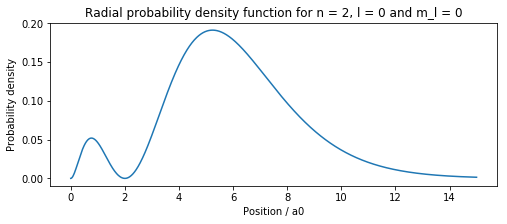

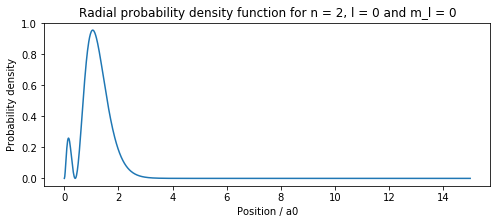

In [55]:
ground = Harmonics(1, 2, 0, 0, 15 * a0)
#ground.tot_prob()
ground.plot_rad_prob()
#ground.plot_rad()
#ground.mean_rad()
#ground.most_probable()
#ground.std_dev()

boron = Harmonics(5, 2, 0, 0, 15 * a0)
boron.plot_rad_prob()